<a href="https://colab.research.google.com/github/sky309/TEDXTALK-Prediction/blob/main/Sarvesh_Kumar_Yadav_TedXTalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Project:
This is a machine learning Capstone project


#Problem Statement:

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 
The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# Business Goal:


# Structure of this Notebook:


# Data Set Glimpse:
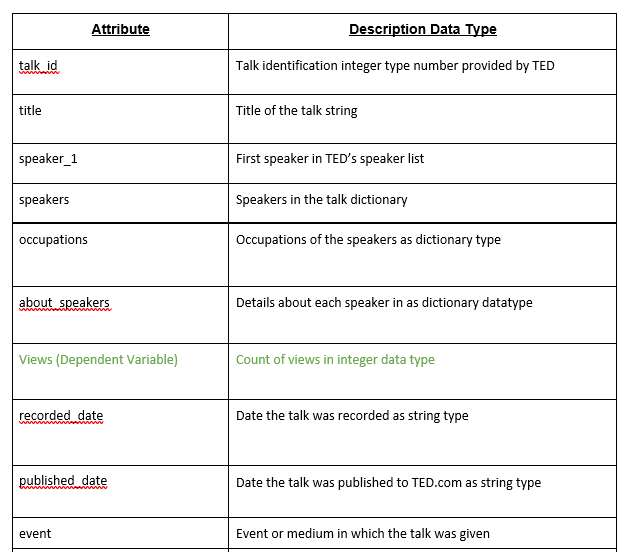

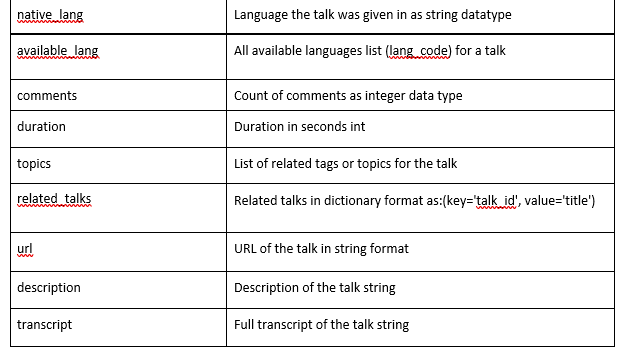

# Importing Libraires and  Packages

1. Numpy: 
2. Pandas
3. Matplotlib
4. Seaborn




In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
import ast

%matplotlib inline

from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

In [373]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


In [374]:
from keras.preprocessing.text import Tokenizer

In [375]:
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")

#Importing the file

In [376]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [377]:
path= '/content/drive/MyDrive/AlmaBetter/Modules/Week-12-TedXTalk- Project/Copy of data_ted_talks.csv'

In [378]:
data= pd.read_csv(path)

# EDA : Exploraroty data analysis:

In [379]:
# Dataframe size
data.shape

(4005, 19)

In [380]:
# Datasets inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [381]:
# data's descriptions
data.describe(include= 'all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,The good news about PMS,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{117: 'Cape Breton fiddling in reel time', 101...",https://www.ted.com/talks/christopher_moot_poo...,"Ric Elias had a front-row seat on Flight 1549,...","You know, culture was born of the imagination,..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [382]:
# Checking for duplicate values:
data[data.duplicated()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript


In [383]:
# Checking for Null values
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [384]:
# keeping copy of the origianl data
copied_data= data.copy()

In [385]:
data['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)

In [386]:
data['occupations']=data['occupations'].apply(lambda x:[val for val in ast.literal_eval(x).values() ])

In [387]:
# Filling null values of all_speakers by speaker_1
data['all_speakers'].fillna(str({0: [str(data['speaker_1'])]}), inplace=True,axis= 0)

In [388]:
data['about_speakers'].fillna(str({0: str(data['occupations'])}), inplace= True, axis=0)

In [389]:
data['about_speakers'].head(1)

0    {0: 'Nobel Laureate Al Gore focused the world’...
Name: about_speakers, dtype: object

In [390]:
# Checking for all columns:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [391]:
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        0
occupations         0
about_speakers      0
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [392]:
# Checking for feature types:

numerical_features   = ['duration',]
temporal_features    = ['recorded_date' , 'published_date']
categorical_features = ['event']

meta_features        = ['topics']
text_corpus_features = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ,]

irrelevant_features  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
unavailable_features = ['available_lang' , 'comments' , 'related_talks']

target = ['views']


all_features = numerical_features + temporal_features + categorical_features + meta_features + text_corpus_features + irrelevant_features + unavailable_features + target

# Formating the datetime type:

In [393]:
from datetime import datetime

In [394]:
today = datetime.now()
today.strftime('%Y-%m-%d')

'2021-09-10'

In [395]:
# Recorded date fromate:
data['recorded_date']= pd.to_datetime(data['recorded_date'])

In [396]:
# Formating the published date time:
data['published_date']= pd.to_datetime(data['published_date'])

# Generating new target variable , daily views:

In [397]:
# Days taken to publish talk
data['days_taken_to_publish'] = data['published_date'] - data['recorded_date']

In [398]:
# Period of day's talk has been published:
last_publishing_date = data['published_date'].max()

data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

In [399]:
# Daily views/Talk:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )

# Removing Irrelevant columns:

In [400]:
# Droping out the columns talk_id, speaker_1
data.drop(['talk_id','time_since_published', 'speaker_1', 'url', 'comments', 'days_taken_to_publish', 'recorded_date', 'published_date', 'related_talks', 'transcript', 'description'], axis=1, inplace = True)

# Feature Engineering:


In [401]:
data.head(2)

,title,all_speakers,occupations,about_speakers,views,event,native_lang,available_lang,duration,topics,daily_views
0,Averting the climate crisis,{0: 'Al Gore'},[[climate advocate]],{0: 'Nobel Laureate Al Gore focused the world’...,3523392,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...",696.735614
1,The best stats you've ever seen,{0: 'Hans Rosling'},[[global health expert; data visionary]],"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2867.645837


In [402]:
data.shape

(4005, 11)

In [403]:
data["all_speakers"] = data["all_speakers"].apply(lambda x : dict(eval(x)) )
data1 = data["all_speakers"].apply(pd.Series )
data = pd.concat([data, data1], axis=1).drop('all_speakers', axis=1)
data.rename(columns={0: "speaker1", 1:"speaker2",  2: "speaker3", 3: "speaker4", 4: "speaker5"}, inplace= True)

In [404]:
data["about_speakers"] = data["about_speakers"].apply(lambda x : dict(eval(str(x))) )
data1 = data["about_speakers"].apply(pd.Series )
data = pd.concat([data, data1], axis=1).drop('about_speakers', axis=1)
data.rename(columns={0: "about_speaker1", 1:"about_speaker2",  2: "about_speaker3", 3: "about_speaker4", 4: "about_speaker5"}, inplace= True)

In [405]:
data1= pd.DataFrame(data["occupations"].to_list(), columns= ['author1_occupations', 'author2_occupations', 'author3_occupations', 'author4_occupations', 'author5_occupations'])
data = pd.concat([data, data1], axis=1).drop('occupations', axis=1)

In [406]:
data.available_lang = data.available_lang.fillna('{}').apply(ast.literal_eval)

In [407]:
data['available_lang_length']= data['available_lang'].apply(lambda x: len(x))

In [408]:
data.head(2)

,title,views,event,native_lang,available_lang,duration,topics,daily_views,speaker1,speaker2,speaker3,speaker4,speaker5,about_speaker1,about_speaker2,about_speaker3,about_speaker4,about_speaker5,author1_occupations,author2_occupations,author3_occupations,author4_occupations,author5_occupations,available_lang_length
0,Averting the climate crisis,3523392,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",977,"['alternative energy', 'cars', 'climate change...",696.735614,Al Gore,NaN,NaN,NaN,NaN,Nobel Laureate Al Gore focused the world’s att...,NaN,NaN,NaN,NaN,[climate advocate],None,None,None,None,43
1,The best stats you've ever seen,14501685,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2867.645837,Hans Rosling,NaN,NaN,NaN,NaN,"In Hans Rosling’s hands, data sings. Global tr...",NaN,NaN,NaN,NaN,[global health expert; data visionary],None,None,None,None,49


In [409]:
data.isna().sum()

title                       0
views                       0
event                       0
native_lang                 0
available_lang              0
duration                    0
topics                      0
daily_views                 0
speaker1                    0
speaker2                 3891
speaker3                 3988
speaker4                 4001
speaker5                 4004
about_speaker1              0
about_speaker2           3897
about_speaker3           3988
about_speaker4           4001
about_speaker5           4004
author1_occupations         0
author2_occupations      3898
author3_occupations      3989
author4_occupations      4001
author5_occupations      4004
available_lang_length       0
dtype: int64

In [410]:
data.drop(['speaker2', 'speaker3', 'speaker4', 'speaker5','about_speaker2', 'about_speaker3', 'about_speaker4', 'about_speaker5', 'author2_occupations', 'author3_occupations', 'author4_occupations','author5_occupations'], axis= 1,inplace= True)

In [411]:
data.shape

(4005, 12)

In [412]:
data.head(2)

,title,views,event,native_lang,available_lang,duration,topics,daily_views,speaker1,about_speaker1,author1_occupations,available_lang_length
0,Averting the climate crisis,3523392,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",977,"['alternative energy', 'cars', 'climate change...",696.735614,Al Gore,Nobel Laureate Al Gore focused the world’s att...,[climate advocate],43
1,The best stats you've ever seen,14501685,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2867.645837,Hans Rosling,"In Hans Rosling’s hands, data sings. Global tr...",[global health expert; data visionary],49


# Removing Outliers from Duration Columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


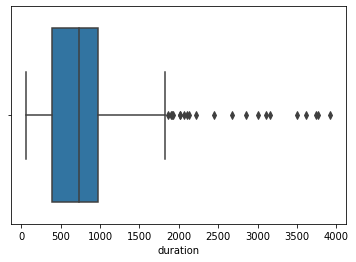

In [413]:
sns.boxplot(data['duration'], data= data)

In [414]:
data_duration_iqr=  data['duration'].quantile(0.75)-data['duration'].quantile(0.25)

In [415]:
data['duration']= data['duration'].mask(data['duration']>(data['duration'].quantile(0.75)+1.5*data_duration_iqr), data['duration'].mean())

In [416]:
data

,title,views,event,native_lang,available_lang,duration,topics,daily_views,speaker1,about_speaker1,author1_occupations,available_lang_length
0,Averting the climate crisis,3523392,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",977.0,"['alternative energy', 'cars', 'climate change...",696.735614,Al Gore,Nobel Laureate Al Gore focused the world’s att...,[climate advocate],43
1,The best stats you've ever seen,14501685,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",1190.0,"['Africa', 'Asia', 'Google', 'demo', 'economic...",2867.645837,Hans Rosling,"In Hans Rosling’s hands, data sings. Global tr...",[global health expert; data visionary],49
2,Simplicity sells,1920832,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",1286.0,"['computers', 'entertainment', 'interface desi...",379.836267,David Pogue,David Pogue is the personal technology columni...,[technology columnist],26
3,Greening the ghetto,2664069,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",1116.0,"['MacArthur grant', 'activism', 'business', 'c...",526.808187,Majora Carter,Majora Carter redefined the field of environme...,[activist for environmental justice],35
4,Do schools kill creativity?,65051954,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",1164.0,"['children', 'creativity', 'culture', 'dance',...",12863.744117,Sir Ken Robinson,Creativity expert Sir Ken Robinson challenges ...,"[author, educator]",62
...,...,...,...,...,...,...,...,...,...,...,...,...
4000,"Crisis support for the world, one text away",502934,TED2020: The Prequel,en,[en],690.0,"['activism', 'data', 'technology', 'mental hea...",125733.500000,Nancy Lublin,"Nancy Lublin, cofounder and CEO of Crisis Text...",[health activist],1
4001,The dark history of IQ tests,307187,TED-Ed,en,"[en, es, my, pt-br]",346.0,"['TED-Ed', 'education', 'history', 'animation'...",76796.750000,Stefan C Dombrowski,0 [[climate advocate...,[other],4
4002,"How ""policing for profit"" undermines your rights",464414,TEDxMileHigh,en,[en],774.0,"['society', 'law', 'policy', 'justice system',...",154804.666667,Dick M. Carpenter II,Dick M. Carpenter II studies cutting edge issu...,[law researcher],1
4003,The electrifying speeches of Sojourner Truth,56582,TED-Ed,en,[en],257.0,"['TED-Ed', 'education', 'animation', 'United S...",56582.000000,Daina Ramey Berry,0 [[climate advocate...,[other],1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


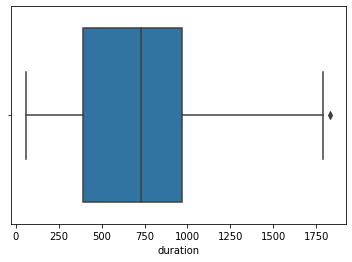

In [417]:
sns.boxplot(data['duration'], data= data)

# Applying NLP part

In [418]:
!pip install contractions
import contractions

In [419]:
def remove_punctuation(text):
  # creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  no_punct=expanded_text.translate(str.maketrans('', '', string.punctuation))

  return no_punct

In [420]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [421]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [422]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [423]:
from nltk.stem.wordnet import WordNetLemmatizer

In [424]:
wnet= WordNetLemmatizer()

In [425]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [426]:
def lemmatize(text):    
    '''a function which stems each word in the given text'''
    text = [wnet.lemmatize(word) for word in text.split()]
    return " ".join(text) 

In [427]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

#Title

In [428]:
data['title'] = data['title'].apply(remove_punctuation)
data['title'] = data['title'].apply(stopwords)
data['title'] = data['title'].apply(lemmatize)
data['title'].head(2)

0    averting climate crisis
1       best stats ever seen
Name: title, dtype: object

# Model fitting XG Boost regressor on data

In [429]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

In [430]:
from sklearn.model_selection import train_test_split

In [431]:
data['title']

0                   averting climate crisis
1                      best stats ever seen
2                           simplicity sell
3                           greening ghetto
4                    school kill creativity
                       ...                 
4000     crisis support world one text away
4001                   dark history iq test
4002       policing profit undermines right
4003    electrifying speech sojourner truth
4004                   important anus ocean
Name: title, Length: 4005, dtype: object

In [432]:
X= tfid_vectorizer.fit_transform(data['title']).toarray()
y= Scaler.fit_transform(data['daily_views'].values.reshape(-1,1))

In [433]:
X.shape

(4005, 4528)

In [434]:
y.shape

(4005, 1)

In [435]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5) 

In [436]:
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [437]:
from sklearn.metrics import r2_score

In [438]:
y_train_pred= xgb_model.predict(X_train)

In [439]:
y_test_pred= xgb_model.predict(X_test)

In [440]:
xgb_model.score(X_train, y_train)

0.6204267398392183

In [441]:
xgb_model.score(X_test, y_test)

-0.11917973135864446

In [442]:
r2_score(y_train, y_train_pred)

0.6204267398392183

In [443]:
r2_score(y_test, y_test_pred)

-0.11917973135864446

In [444]:
y_test_pred= 'A'

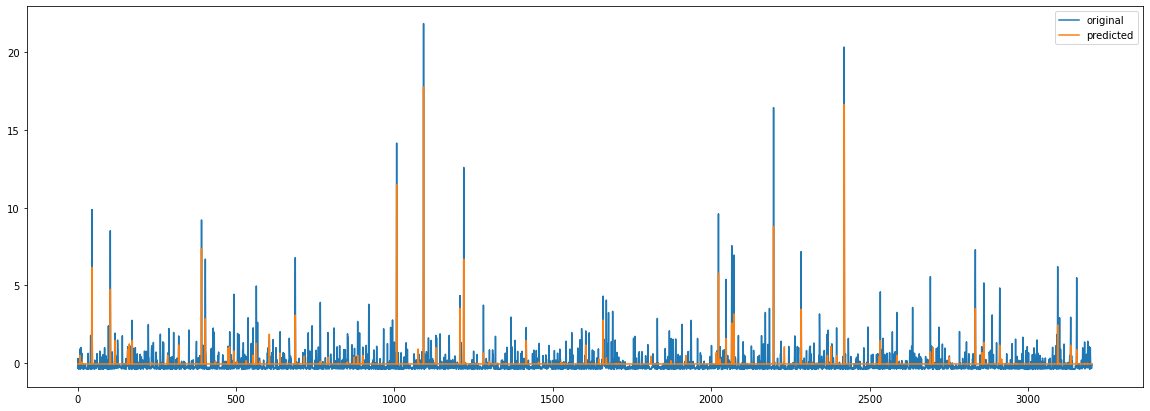

In [445]:
plt.figure(figsize=(20,7))
plt.plot(y_train, label= 'original')
plt.plot(y_train_pred, label= 'predicted')
plt.legend()
plt.show()

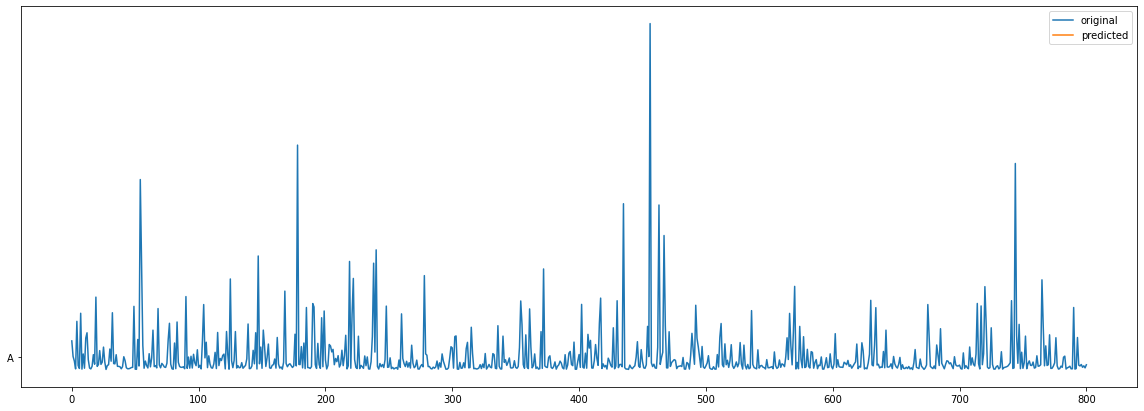

In [446]:
plt.figure(figsize=(20,7))
plt.plot(y_test, label= 'original')
plt.plot(y_test_pred, label= 'predicted')
plt.legend()
plt.show()

# Function to get most repeating word

In [447]:
def get_top_n_words(X,n):
  sum_word= tfid_vectorizer.fit_transform(X).sum(axis=0)
  words_freq= [(word, sum_word[0, idx]) for word, idx in  tfid_vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse= True)
  return words_freq[:n]

In [448]:
get_top_n_words(data['title'], 20)

[('life', 47.85021028006557),
 ('world', 43.835042003788004),
 ('make', 36.22759351162118),
 ('new', 32.348338337709166),
 ('way', 32.019719796848364),
 ('future', 31.26372134527277),
 ('art', 30.416038413575723),
 ('brain', 29.696329457218482),
 ('work', 28.260381662698293),
 ('story', 27.227430713175785),
 ('need', 27.039764753074692),
 ('change', 26.183478617020157),
 ('human', 26.083302208332604),
 ('power', 23.396920118189012),
 ('help', 23.0307628931988),
 ('love', 22.729127954393185),
 ('history', 22.435337510228297),
 ('science', 22.313261380806896),
 ('design', 21.75432989892999),
 ('like', 21.561721821365875)]

# Language

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


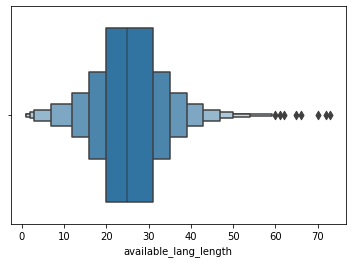

In [449]:
sns.boxenplot(data['available_lang_length'], data= data)

In [450]:
data_available_lang_length_iqr= (data['available_lang_length'].quantile(0.75))-(data['available_lang_length'].quantile(0.25))

In [451]:
data_available_lang_length_iqr= (data['available_lang_length'].quantile(0.75))-(data['available_lang_length'].quantile(0.25))
data['available_lang_length']= data['available_lang_length'].mask(data['available_lang_length']>(data['available_lang_length'].quantile(0.75)+1.5*data_available_lang_length_iqr), data['available_lang_length'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


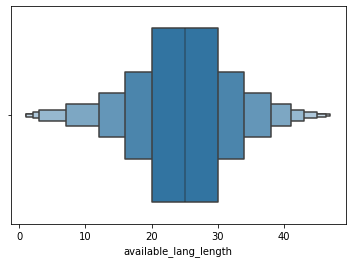

In [452]:
sns.boxenplot(data['available_lang_length'], data= data)

In [453]:
X1= Scaler.fit_transform(data['available_lang_length'].values.reshape(-1,1))
y1= Scaler.fit_transform(data['daily_views'].values.reshape(-1,1))

In [454]:
X_train, X_test, y_train, y_test= train_test_split(X1, y1, test_size=0.20, random_state=5)

In [456]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [459]:
xgb_model.score(X_train, y_train)

0.17086655397726647

In [463]:
xgb_model.score(X_test, y_test)

-0.03296272804178768

In [460]:
y_test_pred= xgb_model.predict(X_test)

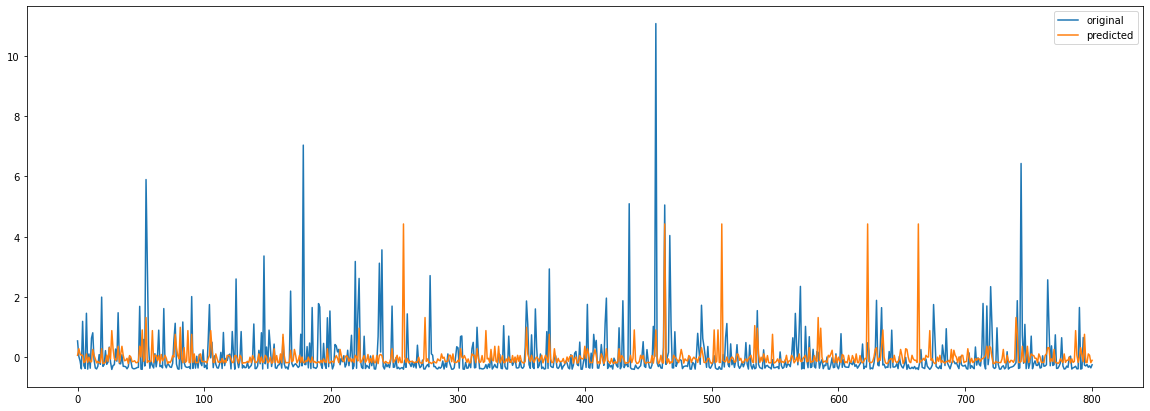

In [461]:
plt.figure(figsize=(20,7))
plt.plot(y_test, label= 'original')
plt.plot(y_test_pred, label= 'predicted')
plt.legend()
plt.show()

#Duration

In [464]:
X1= Scaler.fit_transform(data['duration'].values.reshape(-1,1))
y1= Scaler.fit_transform(data['daily_views'].values.reshape(-1,1))

In [465]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.20, random_state=5)

In [466]:
xgb_model.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [469]:
xgb_model.score(X1_train, y1_train)

0.17518073726797778

In [470]:
xgb_model.score(X1_test, y1_test)

-0.07732520897462969

In [474]:
y1_test_pred= xgb_model.predict(X1_test)

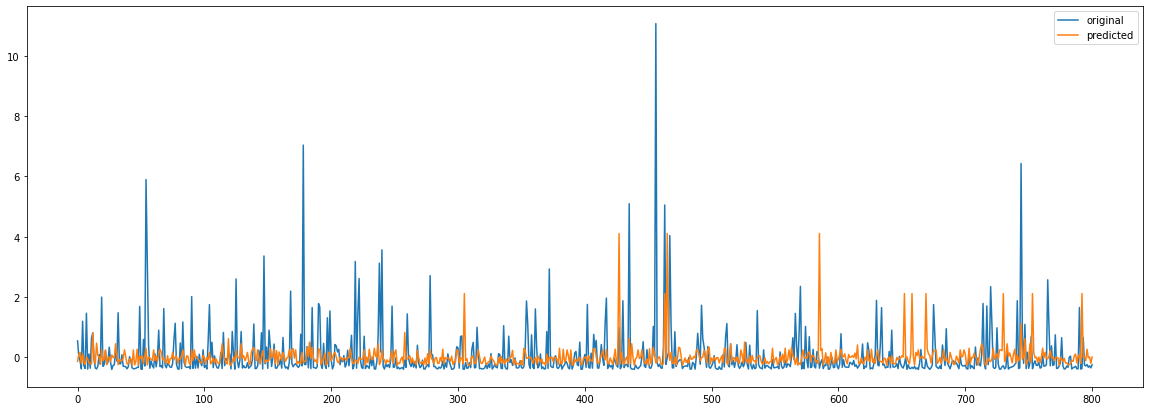

In [475]:
plt.figure(figsize=(20,7))
plt.plot(y1_test, label= 'original')
plt.plot(y1_test_pred, label= 'predicted')
plt.legend()
plt.show()